# Explorar datos
* Obtener estadisticas basicas
* Graficar las variables
    - Histogramas
    - Box plots
    - Scartter plots
* Calcular correlacion con la variable objetivo
* Check si es normal


In [1]:
!pip install --user --upgrade pip

In [2]:
! pip install --user numpy pandas plotly scipy matplotlib

In [3]:
import numpy as np
import os
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Preguntas
* Cuales son las estadisticas descriptivas de la base de autos?

In [4]:
df = pd.read_csv("data/CARS.csv")

In [5]:
conn = sqlite3.connect('data/db_cars')
c = conn.cursor()

In [6]:
df.to_sql('cars', conn, if_exists='replace', index = False)

428

In [7]:
df.head(5)

Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197

In [8]:
df.describe()

EngineSize   Cylinders  Horsepower    MPG_City  MPG_Highway  \
count  428.000000  426.000000  428.000000  428.000000   428.000000   
mean     3.196729    5.807512  215.885514   20.060748    26.843458   
std      1.108595    1.558443   71.836032    5.238218     5.741201   
min      1.300000    3.000000   73.000000   10.000000    12.000000   
25%      2.375000    4.000000  165.000000   17.000000    24.000000   
50%      3.000000    6.000000  210.000000   19.000000    26.000000   
75%      3.900000    6.000000  255.000000   21.250000    29.000000   
max      8.300000   12.000000  500.000000   60.000000    66.000000   

            Weight   Wheelbase      Length  
count   428.000000  428.000000  428.000000  
mean   3577.953271  108.154206  186.362150  
std     758.983215    8.311813   14.357991  
min    1850.000000   89.000000  143.000000  
25%    3104.000000  103.000000  178.000000  
50%    3474.500000  107.000000  187.000000  
75%    3977.750000  112.000000  194.000000  
max    7190.000000  144.000000  238.000000

In [10]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [11]:
variable = [
"MSRP",
"Invoice"  ,
"EngineSize", 
"Cylinders" ,
"Horsepower",      
"MPG_City",      
"MPG_Highway",     
"Weight",   
"Wheelbase",       
"Length"       
]

In [12]:
df_stand = (df[variable] - df[variable].mean())/df[variable].std()
df_stand
df_stand.query("(MSRP>4.0 or MSRP < -4.0) or (Invoice>4.0 or Invoice < -4.0) or(EngineSize>4.0 or EngineSize < -4.0) or (Cylinders>4.0 or Cylinders < -4.0) or (Horsepower>4.0 or Horsepower < -4.0) or (MPG_City>4.0 or MPG_City < -4.0) or (MPG_Highway>4.0 or MPG_Highway < -4.0) or (Weight>4.0 or Weight < -4.0) or (Wheelbase>4.0 or Wheelbase < -4.0) or (Length>4.0 or Length < -4.0)")


C:\Users\dalim\AppData\Local\Temp\ipykernel_19132\1524563825.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_stand = (df[variable] - df[variable].mean())/df[variable].std()
C:\Users\dalim\AppData\Local\Temp\ipykernel_19132\1524563825.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_stand = (df[variable] - df[variable].mean())/df[variable].std()


Cylinders  EngineSize  Horsepower Invoice    Length  MPG_City  \
87    1.406846    2.528671    1.170923     NaN  3.596454 -1.347929   
114   2.690178    4.603369    3.955041     NaN -0.721699 -1.538834   
118   2.690178    3.250305    1.310129     NaN  2.830330 -1.920643   
146   1.406846    1.446219    0.962114     NaN  3.039273 -0.584311   
149  -1.159819   -1.620727   -1.710639     NaN -0.791347  4.951923   
150  -1.801485   -1.079501   -1.989051     NaN -2.184299  7.624588   
373  -1.159819   -1.530522   -1.473989     NaN -0.791347  7.433684   

     MPG_Highway MSRP    Weight  Wheelbase  
87     -1.714529  NaN  1.615381   4.312632  
114    -1.191991  NaN -0.221287  -1.101349  
118    -2.411248  NaN  4.759060   3.470458  
146    -1.191991  NaN  1.278087   4.312632  
149     4.207577  NaN -1.114588  -0.620106  
150     6.820271  NaN -2.276669  -1.582592  
373     4.207577  NaN -0.906414  -0.259174

In [13]:
df_stand.query("(MSRP>4.0 or MSRP < -4.0)")

Empty DataFrame
Columns: [Cylinders, EngineSize, Horsepower, Invoice, Length, MPG_City, MPG_Highway, MSRP, Weight, Wheelbase]
Index: []

In [14]:
df_stand.query("(Invoice>4.0 or Invoice < -4.0)")

Empty DataFrame
Columns: [Cylinders, EngineSize, Horsepower, Invoice, Length, MPG_City, MPG_Highway, MSRP, Weight, Wheelbase]
Index: []

In [15]:
df_stand.query("(MPG_City>4.0 or MPG_City < -4.0)")

Cylinders  EngineSize  Horsepower Invoice    Length  MPG_City  \
149  -1.159819   -1.620727   -1.710639     NaN -0.791347  4.951923   
150  -1.801485   -1.079501   -1.989051     NaN -2.184299  7.624588   
373  -1.159819   -1.530522   -1.473989     NaN -0.791347  7.433684   

     MPG_Highway MSRP    Weight  Wheelbase  
149     4.207577  NaN -1.114588  -0.620106  
150     6.820271  NaN -2.276669  -1.582592  
373     4.207577  NaN -0.906414  -0.259174

In [16]:
df_stand.query("(MPG_Highway>4.0 or MPG_Highway < -4.0)")

Cylinders  EngineSize  Horsepower Invoice    Length  MPG_City  \
149  -1.159819   -1.620727   -1.710639     NaN -0.791347  4.951923   
150  -1.801485   -1.079501   -1.989051     NaN -2.184299  7.624588   
373  -1.159819   -1.530522   -1.473989     NaN -0.791347  7.433684   

     MPG_Highway MSRP    Weight  Wheelbase  
149     4.207577  NaN -1.114588  -0.620106  
150     6.820271  NaN -2.276669  -1.582592  
373     4.207577  NaN -0.906414  -0.259174

In [17]:
df_stand.query("(Weight>4.0 or Weight < -4.0)")

Cylinders  EngineSize  Horsepower Invoice   Length  MPG_City  \
118   2.690178    3.250305    1.310129     NaN  2.83033 -1.920643   

     MPG_Highway MSRP   Weight  Wheelbase  
118    -2.411248  NaN  4.75906   3.470458

In [18]:
df_stand.query("Wheelbase>4.0 or Wheelbase<-4.0")

Cylinders  EngineSize  Horsepower Invoice    Length  MPG_City  \
87    1.406846    2.528671    1.170923     NaN  3.596454 -1.347929   
146   1.406846    1.446219    0.962114     NaN  3.039273 -0.584311   

     MPG_Highway MSRP    Weight  Wheelbase  
87     -1.714529  NaN  1.615381   4.312632  
146    -1.191991  NaN  1.278087   4.312632

In [23]:
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [24]:
df["MSRP"] = df["MSRP"].replace('[\$,]', '', regex=True).astype(float)

In [25]:
df[["Make","Model","Invoice"]]\
    .groupby(["Make"]).agg({"Model":"count","Invoice":"mean"})\
    .sort_values(by="Invoice",ascending=False).head(10)

Model       Invoice
Make                              
Porsche            7  73662.857143
Mercedes-Benz     26  56453.307692
Jaguar            12  56098.416667
Cadillac           8  46426.875000
Hummer             1  45815.000000
Land Rover         3  41851.000000
BMW               20  39620.650000
Audi              19  39330.105263
Lincoln            9  39135.777778
Lexus             11  38760.000000

In [26]:
df.describe()

MSRP        Invoice  EngineSize   Cylinders  Horsepower  \
count     428.000000     428.000000  428.000000  426.000000  428.000000   
mean    32774.855140   30014.700935    3.196729    5.807512  215.885514   
std     19431.716674   17642.117750    1.108595    1.558443   71.836032   
min     10280.000000    9875.000000    1.300000    3.000000   73.000000   
25%     20334.250000   18866.000000    2.375000    4.000000  165.000000   
50%     27635.000000   25294.500000    3.000000    6.000000  210.000000   
75%     39205.000000   35710.250000    3.900000    6.000000  255.000000   
max    192465.000000  173560.000000    8.300000   12.000000  500.000000   

         MPG_City  MPG_Highway       Weight   Wheelbase      Length  
count  428.000000   428.000000   428.000000  428.000000  428.000000  
mean    20.060748    26.843458  3577.953271  108.154206  186.362150  
std      5.238218     5.741201   758.983215    8.311813   14.357991  
min     10.000000    12.000000  1850.000000   89.000000  143.000000  
25%     17.000000    24.000000  3104.000000  103.000000  178.000000  
50%     19.000000    26.000000  3474.500000  107.000000  187.000000  
75%     21.250000    29.000000  3977.750000  112.000000  194.000000  
max     60.000000    66.000000  7190.000000  144.000000  238.000000

In [27]:
df[(df["Invoice"]>98000)|(df["Invoice"]<-34000)]

Make                  Model    Type  Origin DriveTrain  \
262  Mercedes-Benz              CL600 2dr   Sedan  Europe       Rear   
270  Mercedes-Benz           SL55 AMG 2dr  Sports  Europe       Rear   
271  Mercedes-Benz  SL600 convertible 2dr  Sports  Europe       Rear   
334        Porsche            911 GT2 2dr  Sports  Europe       Rear   

         MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
262  128420.0  119600.0         5.5       12.0         493        13   
270  121770.0  113388.0         5.5        8.0         493        14   
271  126670.0  117854.0         5.5       12.0         493        13   
334  192465.0  173560.0         3.6        6.0         477        17   

     MPG_Highway  Weight  Wheelbase  Length  
262           19    4473        114     196  
270           21    4235        101     179  
271           19    4429        101     179  
334           24    3131         93     175

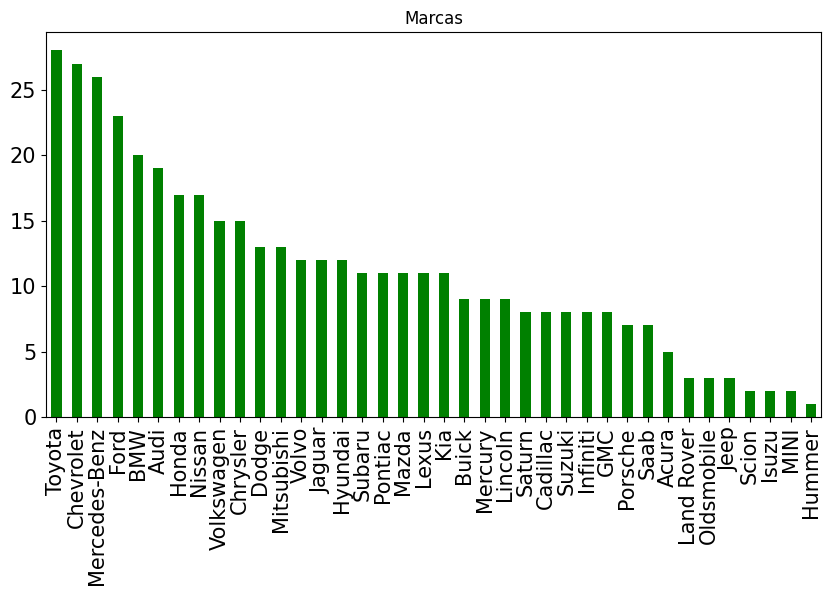

In [71]:
new_data= df['Make'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(10,5),title='Marcas')

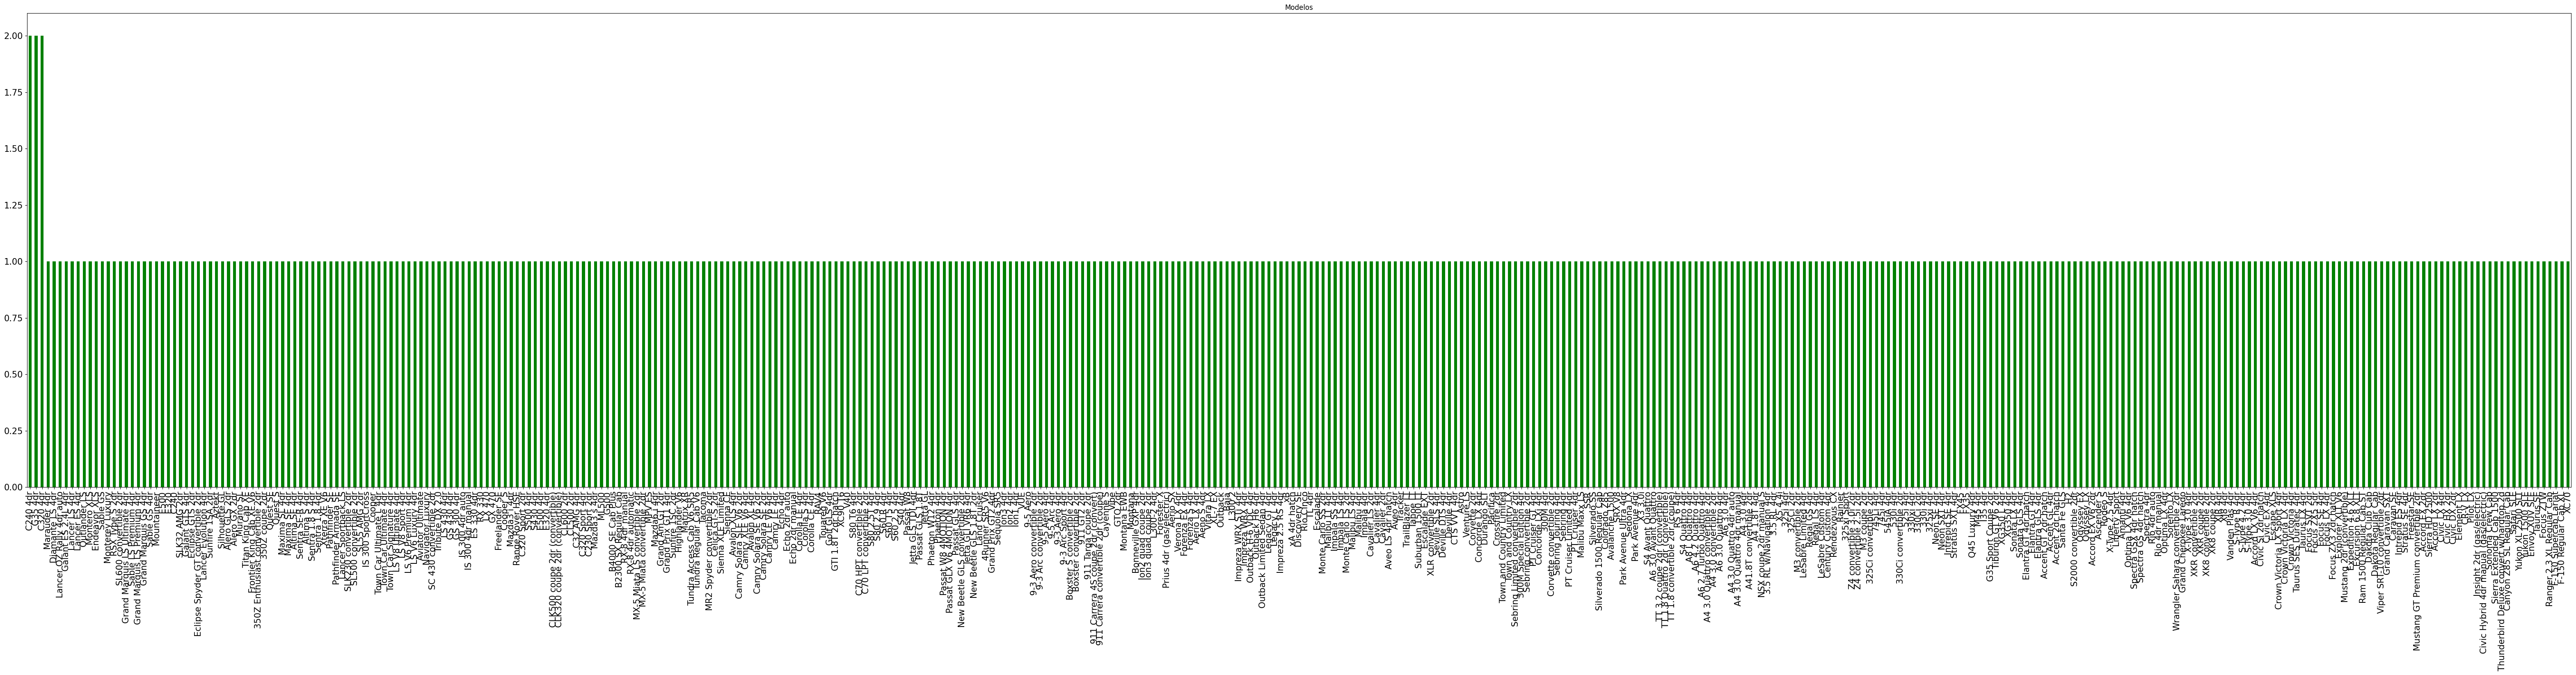

In [74]:
new_data= df['Model'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(80,15),title='Modelos')

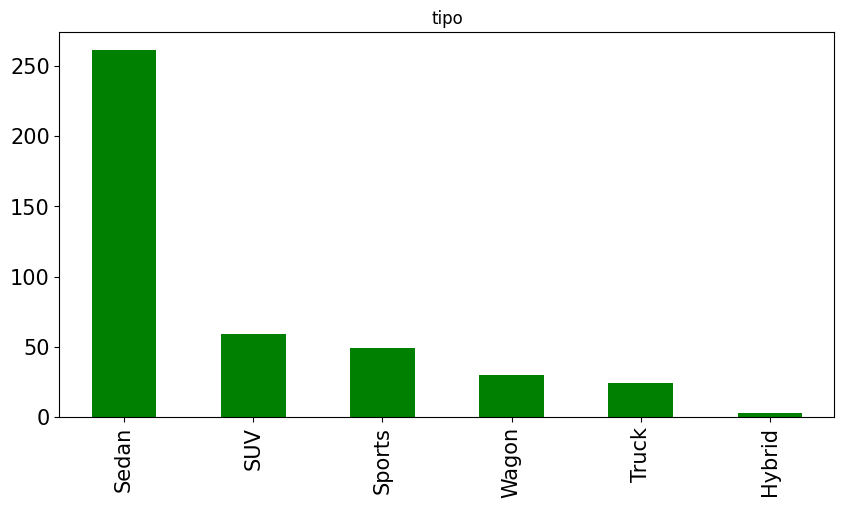

In [76]:
new_data= df['Type'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(10,5),title='tipo')

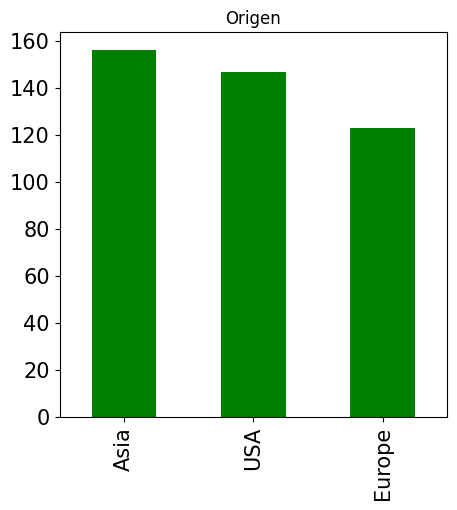

In [78]:
new_data= df['Origin'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(5,5),title='Origen')

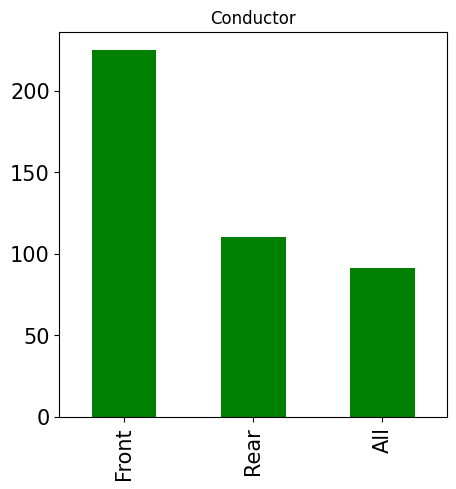

In [72]:
new_data= df['DriveTrain'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(5,5),title='Conductor')

<Axes: >

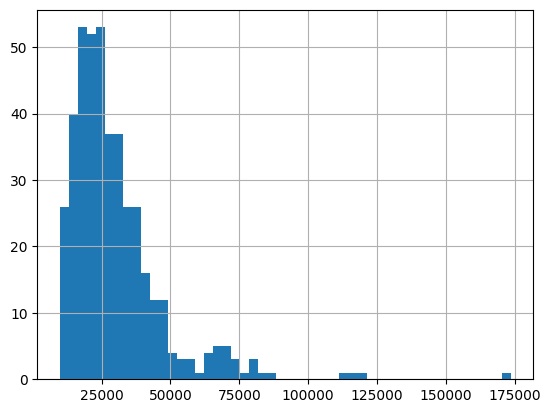

In [29]:
df["Invoice"].hist(bins=50)

<Axes: >

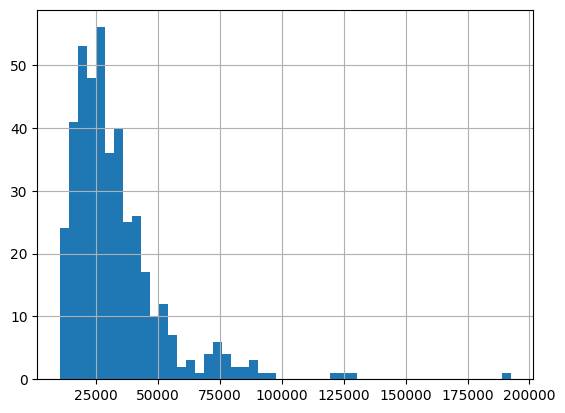

In [30]:
df["MSRP"].hist(bins=50)

<Axes: >

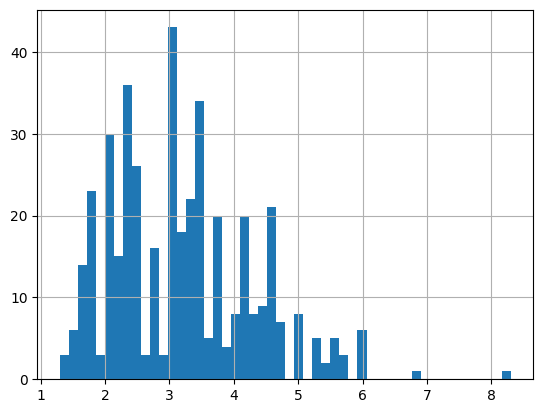

In [31]:
df["EngineSize"].hist(bins=50)

<Axes: >

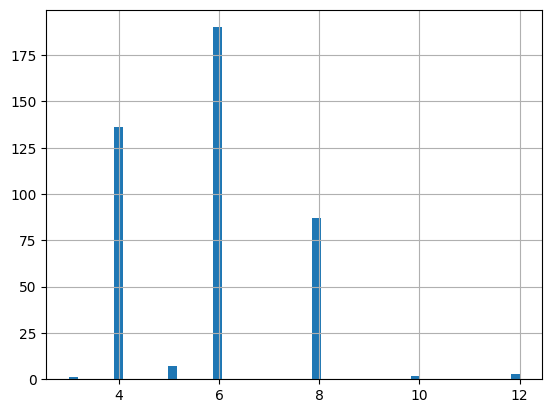

In [32]:
df["Cylinders"].hist(bins=50)

<Axes: >

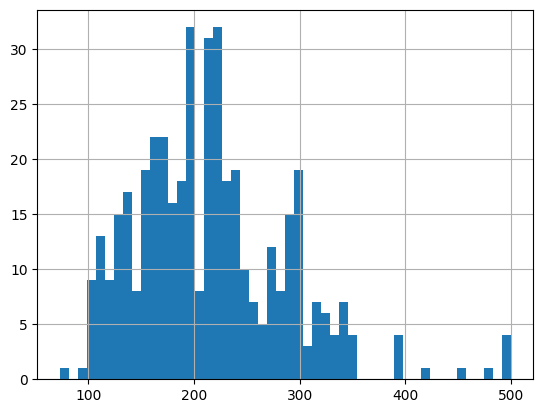

In [33]:
df["Horsepower"].hist(bins=50)

<Axes: >

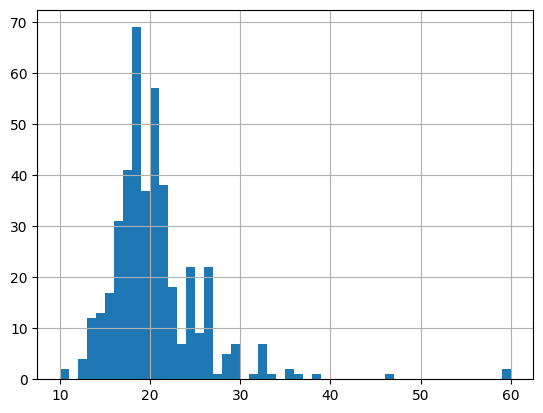

In [35]:
df["MPG_City"].hist(bins=50)

<Axes: >

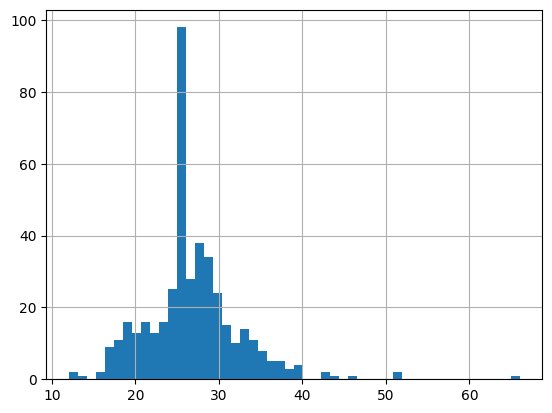

In [36]:
df["MPG_Highway"].hist(bins=50)

<Axes: >

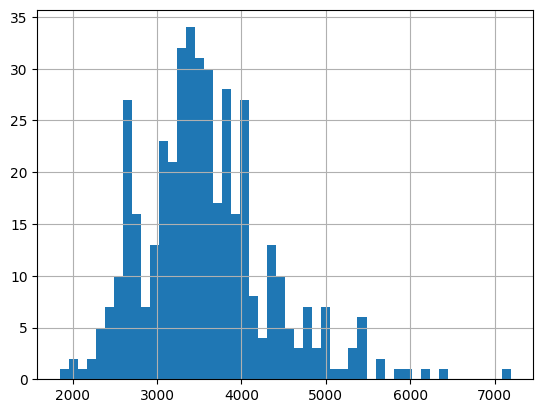

In [37]:
df["Weight"].hist(bins=50)

<Axes: >

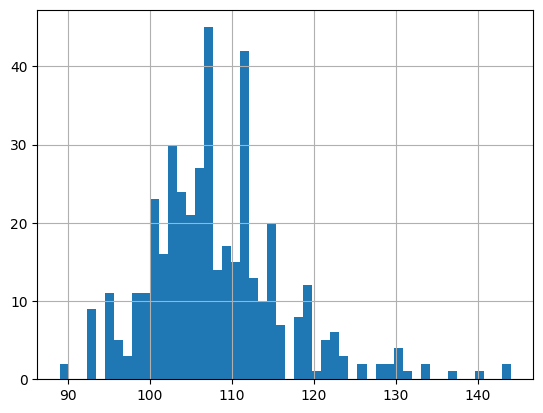

In [38]:
df["Wheelbase"].hist(bins=50)

<Axes: >

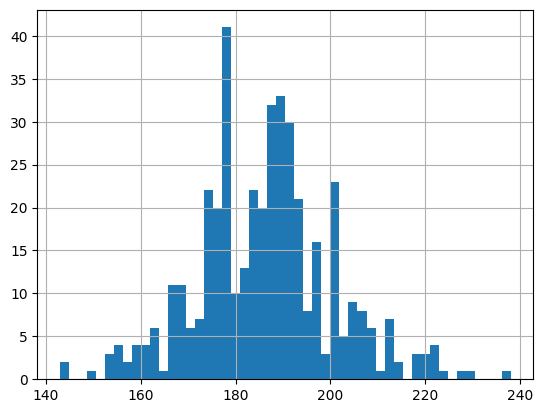

In [39]:
df["Length"].hist(bins=50)

In [40]:
fig = px.histogram(df[["Invoice"]], x="Invoice", nbins=50)
fig.show()

In [41]:
k2, p = stats.normaltest(df[["Invoice"]].query("Invoice <= 50000")["Invoice"].values)
alpha = 1e-3
if p < alpha:
    print("It is not nomal")
else:
    print("It is normal")

It is not nomal


In [42]:
fig = px.histogram(np.log2(df[['Invoice']].query("Invoice <= 70000")), x="Invoice", nbins=50)

fig.show()

In [44]:
k2, p = stats.normaltest(np.log2(df[['MSRP']].query("MSRP <= 70000")).values)
alpha = 1e-3
if p < alpha:
    print("It is not nomal")
else:
    print("It is normal")

It is normal


In [105]:
k2, p = stats.normaltest(np.log2(df[['EngineSize']].query("EngineSize <= 70000")).values)
alpha = 1e-3
if p < alpha:
    print("It is not nomal")
else:
    print("It is normal")

It is not nomal


In [45]:
k2, p = stats.normaltest(np.log2(df[['Cylinders']].query("Cylinders <= 70000")).values)
alpha = 1e-3
if p < alpha:
    print("It is not nomal")
else:
    print("It is normal")

It is not nomal


In [46]:
fig = px.scatter_matrix(df[["MPG_Highway","Horsepower","EngineSize","Wheelbase"]])
fig.show()

In [47]:
fig = px.box(df, x="Make", y="MPG_Highway")
fig.show()

In [48]:
fig = px.box(df, x="Model", y="MPG_Highway")
fig.show()

In [49]:
fig = px.box(df, x="Type", y="MPG_Highway")
fig.show()

In [50]:
fig = px.box(df, x="Origin", y="MPG_Highway")
fig.show()

In [51]:
fig = px.box(df, x="DriveTrain", y="MPG_Highway")
fig.show()

In [52]:
fig = px.box(df, x="Make", y="MPG_City")
fig.show()

In [53]:
fig = px.box(df, x="Model", y="MPG_City")
fig.show()

In [54]:
fig = px.box(df, x="Type", y="MPG_City")
fig.show()

In [55]:
fig = px.box(df, x="Origin", y="MPG_City")
fig.show()

In [56]:
fig = px.box(df, x="DriveTrain", y="MPG_City")
fig.show()

In [57]:
fig = px.imshow(df.corr(), text_auto=True)
fig.show()

C:\Users\dalim\AppData\Local\Temp\ipykernel_19132\2144758936.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [59]:
fig = px.scatter_matrix(df[["MSRP","Invoice","EngineSize","Cylinders", "Horsepower","MPG_City","Weight","Wheelbase", "Length"]])
fig.show()

In [65]:
df = df.query('Model not in ["MSRP","Invoice","EngineSize","Cylinders", "Horsepower","MPG_City","Weight","Wheelbase", "Length"]')

In [66]:
corr = df.corr()

C:\Users\dalim\AppData\Local\Temp\ipykernel_19132\658818363.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [67]:
std = df.std()

C:\Users\dalim\AppData\Local\Temp\ipykernel_19132\4246906588.py:1: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [68]:
for col in corr.columns:
    corr[col][corr[col] > 4 * std[col]] = 0

SyntaxError: invalid non-printable character U+00A0 (3648203963.py, line 2)

In [69]:
fig = px.imshow(corr, text_auto=True)
fig.show()

In [66]:
pd.cut(x=df['Invoice'],bins=20)

0        (26243.5, 34427.75]
1        (18059.25, 26243.5]
2        (18059.25, 26243.5]
3        (26243.5, 34427.75]
4        (34427.75, 42612.0]
5        (34427.75, 42612.0]
6        (75349.0, 83533.25]
7        (18059.25, 26243.5]
8        (26243.5, 34427.75]
9        (26243.5, 34427.75]
10       (26243.5, 34427.75]
11       (26243.5, 34427.75]
12       (26243.5, 34427.75]
13       (34427.75, 42612.0]
14       (34427.75, 42612.0]
15       (34427.75, 42612.0]
16       (34427.75, 42612.0]
17       (42612.0, 50796.25]
18       (58980.5, 67164.75]
19       (42612.0, 50796.25]
20       (75349.0, 83533.25]
21       (26243.5, 34427.75]
22       (26243.5, 34427.75]
23       (34427.75, 42612.0]
24       (34427.75, 42612.0]
25       (42612.0, 50796.25]
26       (26243.5, 34427.75]
27       (42612.0, 50796.25]
28       (18059.25, 26243.5]
29       (26243.5, 34427.75]
30       (34427.75, 42612.0]
31       (26243.5, 34427.75]
32       (26243.5, 34427.75]
33       (26243.5, 34427.75]
34       (2624

In [52]:
pd.qcut(df['Invoice'], 10)

0       (32987.5, 38401.2]
1       (20288.1, 23009.2]
2       (23009.2, 25294.5]
3       (28963.6, 32987.5]
4       (38401.2, 48103.3]
5       (38401.2, 48103.3]
6      (48103.3, 173560.0]
7       (23009.2, 25294.5]
8       (28963.6, 32987.5]
9       (25294.5, 28963.6]
10      (28963.6, 32987.5]
11      (28963.6, 32987.5]
12      (32987.5, 38401.2]
13      (32987.5, 38401.2]
14      (32987.5, 38401.2]
15      (38401.2, 48103.3]
16      (38401.2, 48103.3]
17      (38401.2, 48103.3]
18     (48103.3, 173560.0]
19      (38401.2, 48103.3]
20     (48103.3, 173560.0]
21      (28963.6, 32987.5]
22      (32987.5, 38401.2]
23      (32987.5, 38401.2]
24      (32987.5, 38401.2]
25      (38401.2, 48103.3]
26      (32987.5, 38401.2]
27      (38401.2, 48103.3]
28      (25294.5, 28963.6]
29      (25294.5, 28963.6]
30      (32987.5, 38401.2]
31      (25294.5, 28963.6]
32      (28963.6, 32987.5]
33      (32987.5, 38401.2]
34      (32987.5, 38401.2]
35      (32987.5, 38401.2]
36      (38401.2, 48103.3]
3